# Machine Learning : Logistic Regression 


## (to know when to use Logistic regression)

## Please check (  <font color='red'>  Statistics for Biologist : Lecture 5 </font>) : https://youtu.be/6MKsZIq5pqc?t=1493 

In [22]:
from pandas import read_csv
filename = 'pima-indians-diabetes_kaggle.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

In [23]:
# Here we are dividing dataset into training (70%) and test (30%). 
# Training data will be used to traing the logistic model and to evaluate the model performace test data will be utilized.

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.30  #70% will be utilized for training
seed = 7 # Seed is used so that splitting of dataset into trianing & test is same for each run by the user
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, Y_train)

result = model.score(X_test, Y_test)

print("Accuracy: is ", str(round(result*100.0,2)), "%")

Accuracy: is  76.19 %


In [25]:
#import numpy as np
OP=model.predict(X_test[0:5,:])
print(X_test.shape)
print((OP))

print(Y_test[0:5])
#print(X_test)

(231, 8)
[0. 1. 1. 0. 0.]
[0. 1. 1. 0. 1.]


# <font color='red'> Odds Ratio

In [40]:
from pandas import read_csv
filename = 'pima-indians-diabetes_kaggle.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

X=dataframe.iloc[:,:8]
Y=dataframe.iloc[:,8]

type(X)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(X,Y)
model.score(X,Y)

0.7747395833333334

In [34]:
import numpy as np
coef_DF=pd.DataFrame(data={'Variable':list(X),
'value':(model.coef_[0])})

coef_DF_standardised=pd.DataFrame(data={'Variable':list(X),
'value':(model.coef_[0])*np.std(X,axis=0)/np.std(Y)})

In [35]:
coef_DF

,Variable,value
0,preg,0.117052
1,plas,0.028387
2,pres,-0.016890
3,skin,0.000755
4,test,-0.000643
5,mass,0.059760
6,pedi,0.677672
7,age,0.007239


In [36]:
coef_DF_standardised

,Variable,value
preg,preg,0.826954
plas,plas,1.902960
pres,pres,-0.685425
skin,skin,0.025261
test,test,-0.155307
mass,mass,0.987858
pedi,pedi,0.470765
age,age,0.178504


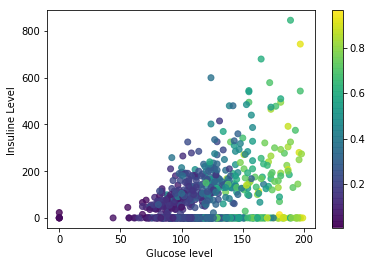

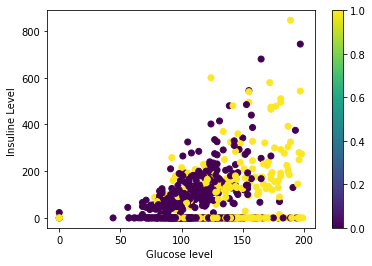

In [53]:
%matplotlib inline 
from matplotlib import pyplot as plt

plt.figure()
sc=plt.scatter(X.iloc[:,1],X.iloc[:,4],c=model.predict_proba(X)[:,1],alpha=0.8)
plt.colorbar(sc)
plt.xlabel('Glucose level ')
plt.ylabel('Insuline Level ')
plt.show()


plt.figure()
sc=plt.scatter(X.iloc[:,1],X.iloc[:,4],c=Y,alpha=1)
plt.colorbar(sc)
plt.xlabel('Glucose level ')
plt.ylabel('Insuline Level ')
plt.show()